In [1]:
# gpt summary of the code
import pandas as pd
import numpy as np
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.text import TextPath
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import warnings
warnings.filterwarnings("ignore")

# Define the compass function to generate complex numbers representing compass points
def compass(r, T, s):
    """
    Generate complex numbers representing compass points.

    Args:
        r (float): Radius of the compass.
        T (int): Number of compass points.
        s (array-like): Sequence of values representing compass positions.

    Returns:
        array-like: Complex numbers representing compass points.
    """
    return r * np.exp(1j * 2 * np.pi * s / T)

# Define the init_atlas function to initialize the atlas figure
def init_atlas(sx, sy):
    """
    Initialize the atlas figure.

    Args:
        sx (float): Figure size along the x-axis.
        sy (float): Figure size along the y-axis.
    """
    plt.figure(figsize=(sx, sy))

# Define the see_atlas function to visualize the atlas without colors or text labels
def see_atlas(atlas, symbol_size, symbol_shape):
    """
    Visualize the atlas without colors or text labels.

    Args:
        atlas (array-like): Complex numbers representing compass points.
        symbol_size (float): Size of the symbols.
        symbol_shape (string): Shape of the symbols.
    """
    plt.scatter(atlas.real, atlas.imag, s=symbol_size, marker=symbol_shape)

# Define the color_atlas function to visualize the atlas with colors based on a colormap
def color_atlas(atlas, symbol_size, symbol_shape, symbol_color, cmap, T_color):
    """
    Visualize the atlas with colors based on a colormap.

    Args:
        atlas (array-like): Complex numbers representing compass points.
        symbol_size (float): Size of the symbols.
        symbol_shape (string): Shape of the symbols.
        symbol_color (array-like): Sequence of values representing symbol colors.
        cmap (string): Name of the colormap.
        T_color (float): Number of color categories.
    """
    get_color = cm.get_cmap(cmap, T_color)
    plt.scatter(atlas.real, atlas.imag, s=symbol_size, marker=symbol_shape,
                color=get_color(symbol_color % T_color))

# Define the atlas_view function to visualize the atlas with colors and text labels
def atlas_view(symbol, T_symbol, atlas, symbol_size, symbol_shape, symbol_color, cmap, T_color, char_flag, T_char,
               char_color, char_size, cmap_char):
    """
    Visualize the atlas with colors and text labels.

    Args:
        symbol (array-like): Sequence of values representing symbols.
        T_symbol (float): Number of symbol categories.
        atlas (array-like): Complex numbers representing compass points.
        symbol_size (float): Size of the symbols.
        symbol_shape (string): Shape of the symbols.
        symbol_color (array-like): Sequence of values representing symbol colors.
        cmap (string): Name of the colormap for symbol colors.
        T_color (float): Number of color categories for symbols.
        char_flag (bool): Flag to enable text labels.
        T_char (float): Number of categories for text labels.
        char_color (array-like): Sequence of values representing text label colors.
        char_size (float): Size of the text labels.
        cmap_char (string): Name of the colormap for text label colors.
    """
    get_color = cm.get_cmap(cmap, T_color)
    get_char_color = cm.get_cmap(cmap_char, T_char)
    plt.scatter(atlas.real, atlas.imag, s=symbol_size, marker=symbol_shape,
                color=get_color(symbol_color % T_color))
    if char_flag:
        plt.text(atlas.real, atlas.imag, str(symbol % T_symbol), size=char_size,
                 color=get_char_color(char_color % T_symbol))

# Define the compass_signed function to generate signed compass points
def compass_signed(r, T_pos, T_neg, s):
    """
    Generate signed compass points.

    Args:
        r (float): Radius of the compass.
        T_pos (int): Number of positive compass points.
        T_neg (int): Number of negative compass points.
        s (array-like): Sequence of values representing compass positions.

    Returns:
        array-like: Complex numbers representing signed compass points.
    """
    return r * np.exp(1j * (np.pi / T_pos) * s)

# Define the get_colors function to retrieve colors for symbols based on a colormap
def get_colors(symbol, cmap, variable_sizes, base_size):
    """
    Retrieve colors for symbols based on a colormap.

    Args:
        symbol (array-like): Sequence of values representing symbols.
        cmap (string): Name of the colormap.
        variable_sizes (bool): Flag to enable variable symbol sizes.
        base_size (float): Base size for symbols.

    Returns:
        tuple: Tuple containing marker types, color normalization, colors, normalized sequence,
               and symbol sizes.
    """
    markers = ['o' if t >= 0 else 'd' for t in symbol]
    norm = plt.Normalize(min(symbol), max(symbol))
    colors = [cmap(norm(value)) for value in symbol]
    norm_seq = norm(symbol)
    if variable_sizes:
        sizes = (base_size + 1) * np.abs(symbol)
    else:
        sizes = base_size * np.ones(len(symbol))
    return markers, norm, colors, norm_seq, sizes

# Define the plot_atlas function to visualize the atlas with symbols
def plot_atlas(atlas, symbol, cmap, alpha, sx, sy, variable_sizes, base_size):
    """
    Visualize the atlas with symbols.

    Args:
        atlas (array-like): Complex numbers representing compass points.
        symbol (array-like): Sequence of values representing symbols.
        cmap (string): Name of the colormap for symbol colors.
        alpha (float): Transparency of the symbols.
        sx (float): Figure size along the x-axis.
        sy (float): Figure size along the y-axis.
        variable_sizes (bool): Flag to enable variable symbol sizes.
        base_size (float): Base size for symbols.
    """
    markers, norm, colors, norm_seq, sizes = get_colors(symbol, cmap, variable_sizes, base_size)

    init_atlas(sx, sy)
    for i in range(len(atlas)):
        plt.scatter(atlas[i].real, atlas[i].imag, color=colors[i], s=sizes[i], marker=markers[i],
                    facecolor=colors[i], edgecolors='black', alpha=alpha)

# Define the plot_atlas_text function to visualize the atlas with symbols and text labels
def plot_atlas_text(atlas, symbol, cmap, alpha, sx, sy, legend_flag, variable_sizes, base_size):
    """
    Visualize the atlas with symbols and text labels.

    Args:
        atlas (array-like): Complex numbers representing compass points.
        symbol (array-like): Sequence of values representing symbols.
        cmap (string): Name of the colormap for symbol colors.
        alpha (float): Transparency of the symbols.
        sx (float): Figure size along the x-axis.
        sy (float): Figure size along the y-axis.
        legend_flag (bool): Flag to enable the legend.
        variable_sizes (bool): Flag to enable variable symbol sizes.
        base_size (float): Base size for symbols.
    """
    markers, norm, colors, norm_seq, sizes = get_colors(symbol, cmap, variable_sizes, base_size)

    init_atlas(sx, sy)
    for i in range(len(atlas)):
        plt.scatter(atlas[i].real, atlas[i].imag, color=colors[i], s=sizes[i], marker=markers[i],
                    facecolor=colors[i], edgecolors='black', alpha=alpha)
        plt.text(atlas[i].real, atlas[i].imag, str(symbol[i]), fontsize=8)

    if legend_flag:
        plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label="Symbol Value")


In [2]:
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "gray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})


In [4]:
mod_24_clk  =   compass(r=1,T=24,s=np.arange(24)%24)

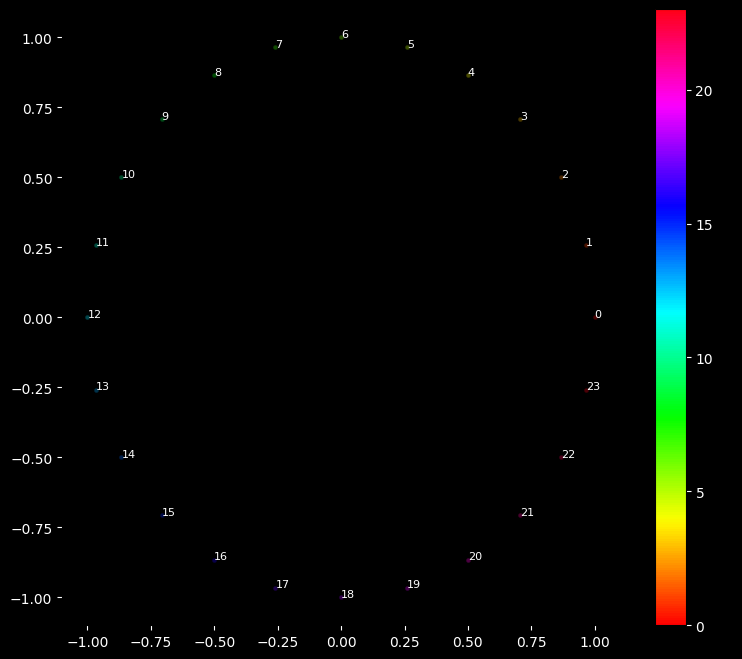

In [5]:
plot_atlas_text(atlas=mod_24_clk
                ,symbol=np.arange(mod_24_clk.size),
                cmap=plt.cm.hsv,
                alpha=0.3,
                sx=9,
                sy=8,
                legend_flag=1,
                variable_sizes=0,
                base_size=12)